In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('../data/train_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32427 entries, 0 to 32426
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_total        32427 non-null  int64  
 1   area               32427 non-null  float64
 2   price_per_m2       32427 non-null  float64
 3   category           32427 non-null  object 
 4   latitude           32427 non-null  float64
 5   longitude          32427 non-null  float64
 6   district           32427 non-null  object 
 7   province           32427 non-null  object 
 8   legal_status       32427 non-null  object 
 9   frontage           32427 non-null  float64
 10  road_width         32427 non-null  float64
 11  num_bedrooms       32427 non-null  int64  
 12  num_toilets        32427 non-null  int64  
 13  num_floors         32427 non-null  int64  
 14  num_schools_1km    32427 non-null  int64  
 15  num_hospitals_2km  32427 non-null  int64  
 16  num_markets_1km    324

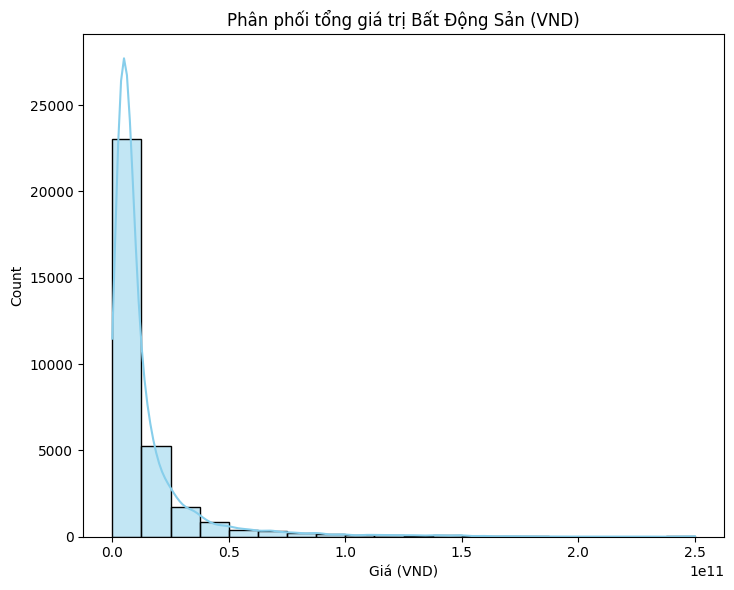

In [11]:
plt.figure(figsize=(14, 6))

# Biểu đồ phân phối giá (Histogram)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='price_total', bins=20, kde=True, color='skyblue')
plt.title('Phân phối tổng giá trị Bất Động Sản (VND)')
plt.xlabel('Giá (VND)')

plt.tight_layout()
plt.show()

C:\Users\84333\AppData\Local\Temp\ipykernel_3120\1374223743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='province', y='price_total', palette='Set2')


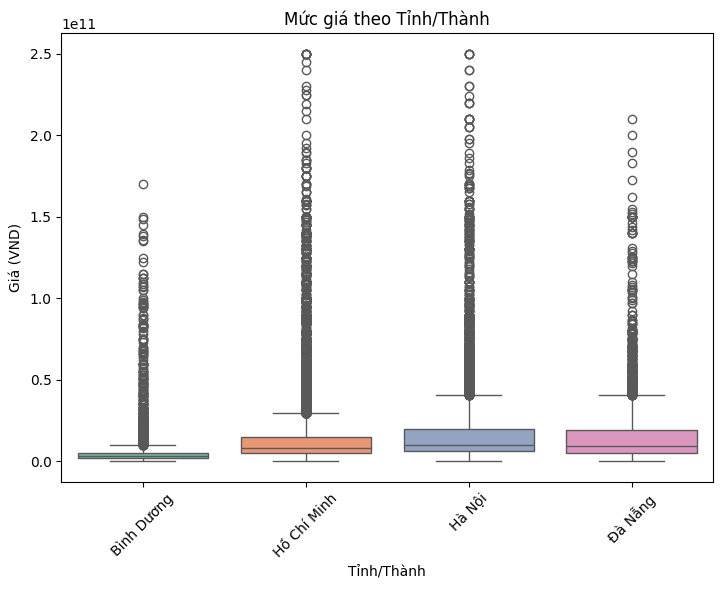

In [12]:
plt.figure(figsize=(14, 6))

# Biểu đồ giá theo từng Tỉnh/Thành phố (Boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='province', y='price_total', palette='Set2')
plt.title('Mức giá theo Tỉnh/Thành')
plt.xlabel('Tỉnh/Thành')
plt.ylabel('Giá (VND)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

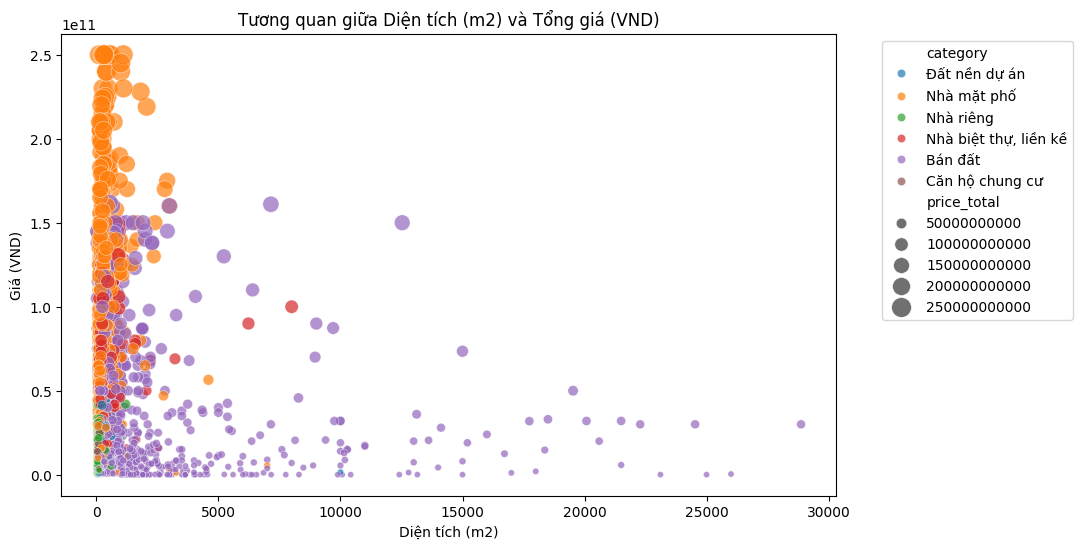

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='area', 
    y='price_total', 
    hue='category',   # Tô màu theo loại hình BĐS
    size='price_total', 
    sizes=(20, 200), 
    alpha=0.7
)
plt.title('Tương quan giữa Diện tích (m2) và Tổng giá (VND)')
plt.xlabel('Diện tích (m2)')
plt.ylabel('Giá (VND)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\84333\AppData\Local\Temp\ipykernel_3120\2470815786.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x='price_total', y='category', palette='viridis')


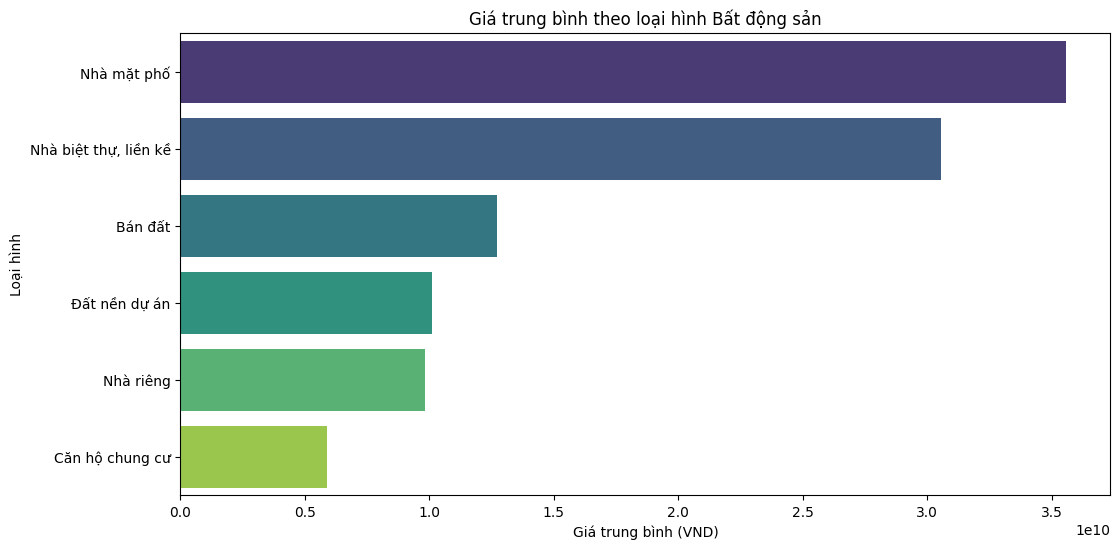

In [14]:
# Tính giá trung bình cho từng loại
avg_price = df.groupby('category')['price_total'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price, x='price_total', y='category', palette='viridis')
plt.title('Giá trung bình theo loại hình Bất động sản')
plt.xlabel('Giá trung bình (VND)')
plt.ylabel('Loại hình')
plt.show()

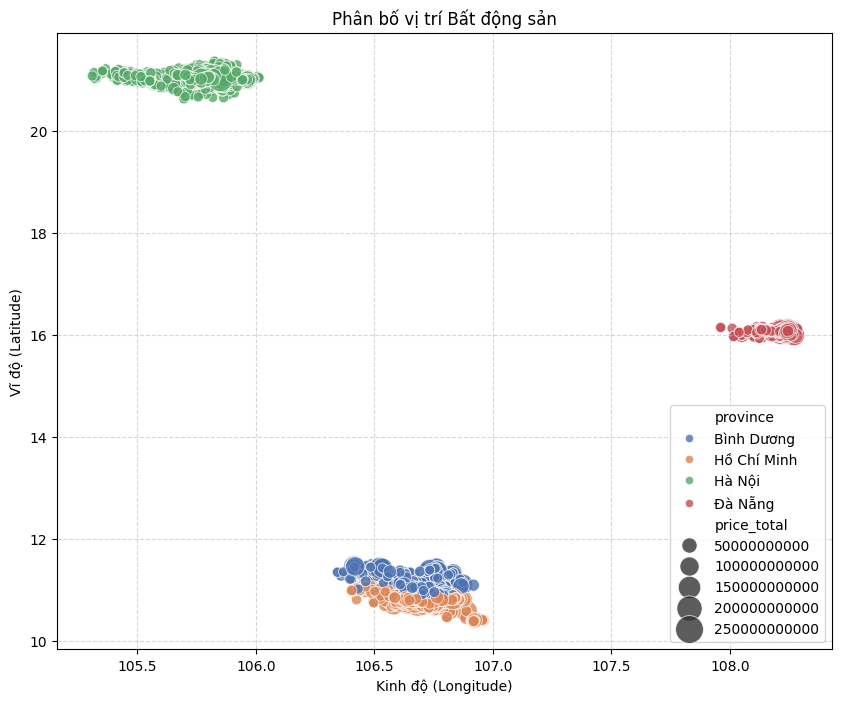

In [15]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df, 
    x='longitude', 
    y='latitude', 
    hue='province',      # Màu sắc theo tỉnh
    size='price_total', # Kích thước chấm theo giá tiền
    sizes=(50, 400),
    palette='deep',
    alpha=0.8
)
plt.title('Phân bố vị trí Bất động sản')
plt.xlabel('Kinh độ (Longitude)')
plt.ylabel('Vĩ độ (Latitude)')
plt.legend(loc='lower right') # Đặt chú thích ở góc
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

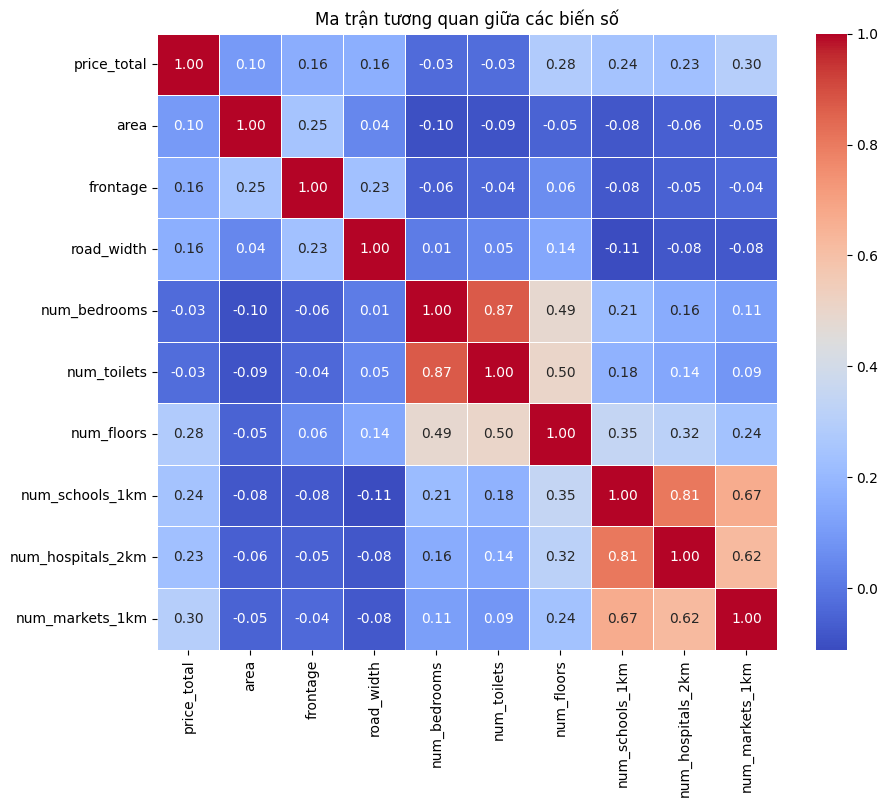

In [16]:
# Chọn các cột số quan trọng để xem tương quan
cols_corr = ['price_total', 'area', 'frontage', 'road_width', 'num_bedrooms', 'num_toilets',  'num_floors',
             'num_schools_1km', 'num_hospitals_2km', 'num_markets_1km']

plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến số')
plt.show()